# Reconocimiento de sentimientos por imagen

## Entrenamiento del modelo

In [ ]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB ? eta 0:00:000:00:0100:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Creamos el modelo

In [ ]:
from tensorflow import keras
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Model

def build_model():
    # Definición de la entrada
    input_layer = Input(shape=(48, 48, 1))

    # Capas de convolución
    conv = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(input_layer)
    conv = Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(conv)
    conv = BatchNormalization()(conv)
    conv = MaxPool2D(pool_size=(2, 2))(conv)
    conv = Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(conv)
    conv = Conv2D(filters=256, kernel_size=(3, 3), activation="relu")(conv)
    conv = BatchNormalization()(conv)
    conv = MaxPool2D(pool_size=(2, 2))(conv)

    # Capas completamente conectadas
    flatten = Flatten()(conv)
    dense = Dense(100, activation="relu")(flatten)
    dropout = Dropout(0.3)(dense)

    # Capa de salida
    output_layer = Dense(3, activation="softmax")(dropout)

    # Compilar el modelo
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    return model

# Construir y mostrar un resumen del modelo
model = build_model()
model.summary()



2024-03-06 17:01:49.484728: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 17:01:49.609744: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-06 17:01:50.055978: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 17:01:50.056033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 17:01:50.127186: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 44, 44, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856 

In [ ]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
520/520 [==============================] - 96s 180ms/step - loss: 1.0693 - accuracy: 0.5349 - val_loss: 1.0729 - val_accuracy: 0.4513
Epoch 2/20
520/520 [==============================] - 94s 180ms/step - loss: 0.7817 - accuracy: 0.6308 - val_loss: 0.7817 - val_accuracy: 0.6307
Epoch 3/20
520/520 [==============================] - 108s 208ms/step - loss: 0.7071 - accuracy: 0.6755 - val_loss: 0.6979 - val_accuracy: 0.6839
Epoch 4/20
520/520 [==============================] - 101s 194ms/step - loss: 0.6632 - accuracy: 0.6983 - val_loss: 0.6973 - val_accuracy: 0.6733
Epoch 5/20
520/520 [==============================] - 90s 173ms/step - loss: 0.6215 - accuracy: 0.7198 - val_loss: 0.7684 - val_accuracy: 0.6750
Epoch 6/20
520/520 [==============================] - 90s 174ms/step - loss: 0.5765 - accuracy: 0.7428 - val_loss: 0.6546 - val_accuracy: 0.7046
Epoch 7/20
520/520 [==============================] - 97s 187ms/step - loss: 0.5340 - accuracy: 0.7602 - val_loss: 0.6898 - val_

Evaluamos el rendimiento del modelo (porcentaje de acierto)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisión en los datos de prueba:', test_acc)

130/130 [==============================] - 5s 38ms/step - loss: 1.3240 - accuracy: 0.7121
Precisión en los datos de prueba: 0.7120519876480103


Hacemos la predicción

In [ ]:
predictions = model.predict(x_test)

130/130 [==============================] - 8s 56ms/step


Definimos las predicciones y los datos verdaderos.

In [ ]:
y_true = y_test.argmax(axis=1)
y_pred = predictions.argmax(axis=1)

In [ ]:
y_true

array([1, 0, 2, ..., 2, 0, 0])

In [ ]:
y_pred

array([2, 0, 2, ..., 2, 0, 0])

Matriz confusión

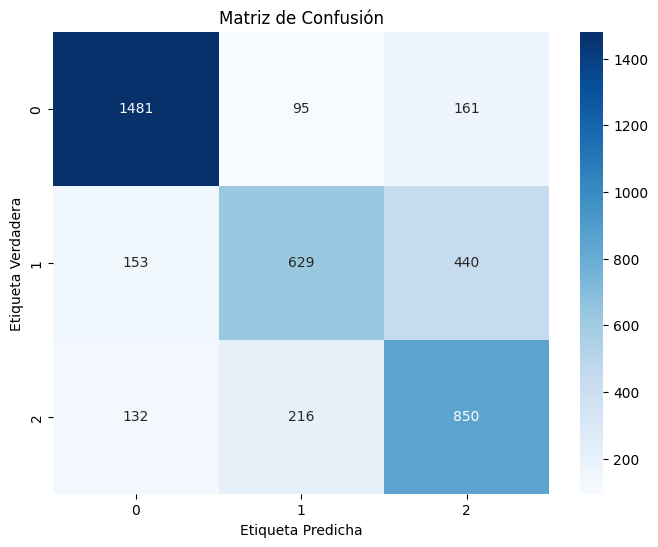

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

Gráfico de precisión y exhaustividad

Mostramos los primeros 64 números junto con la categoría real y el valor que predice el modelo.

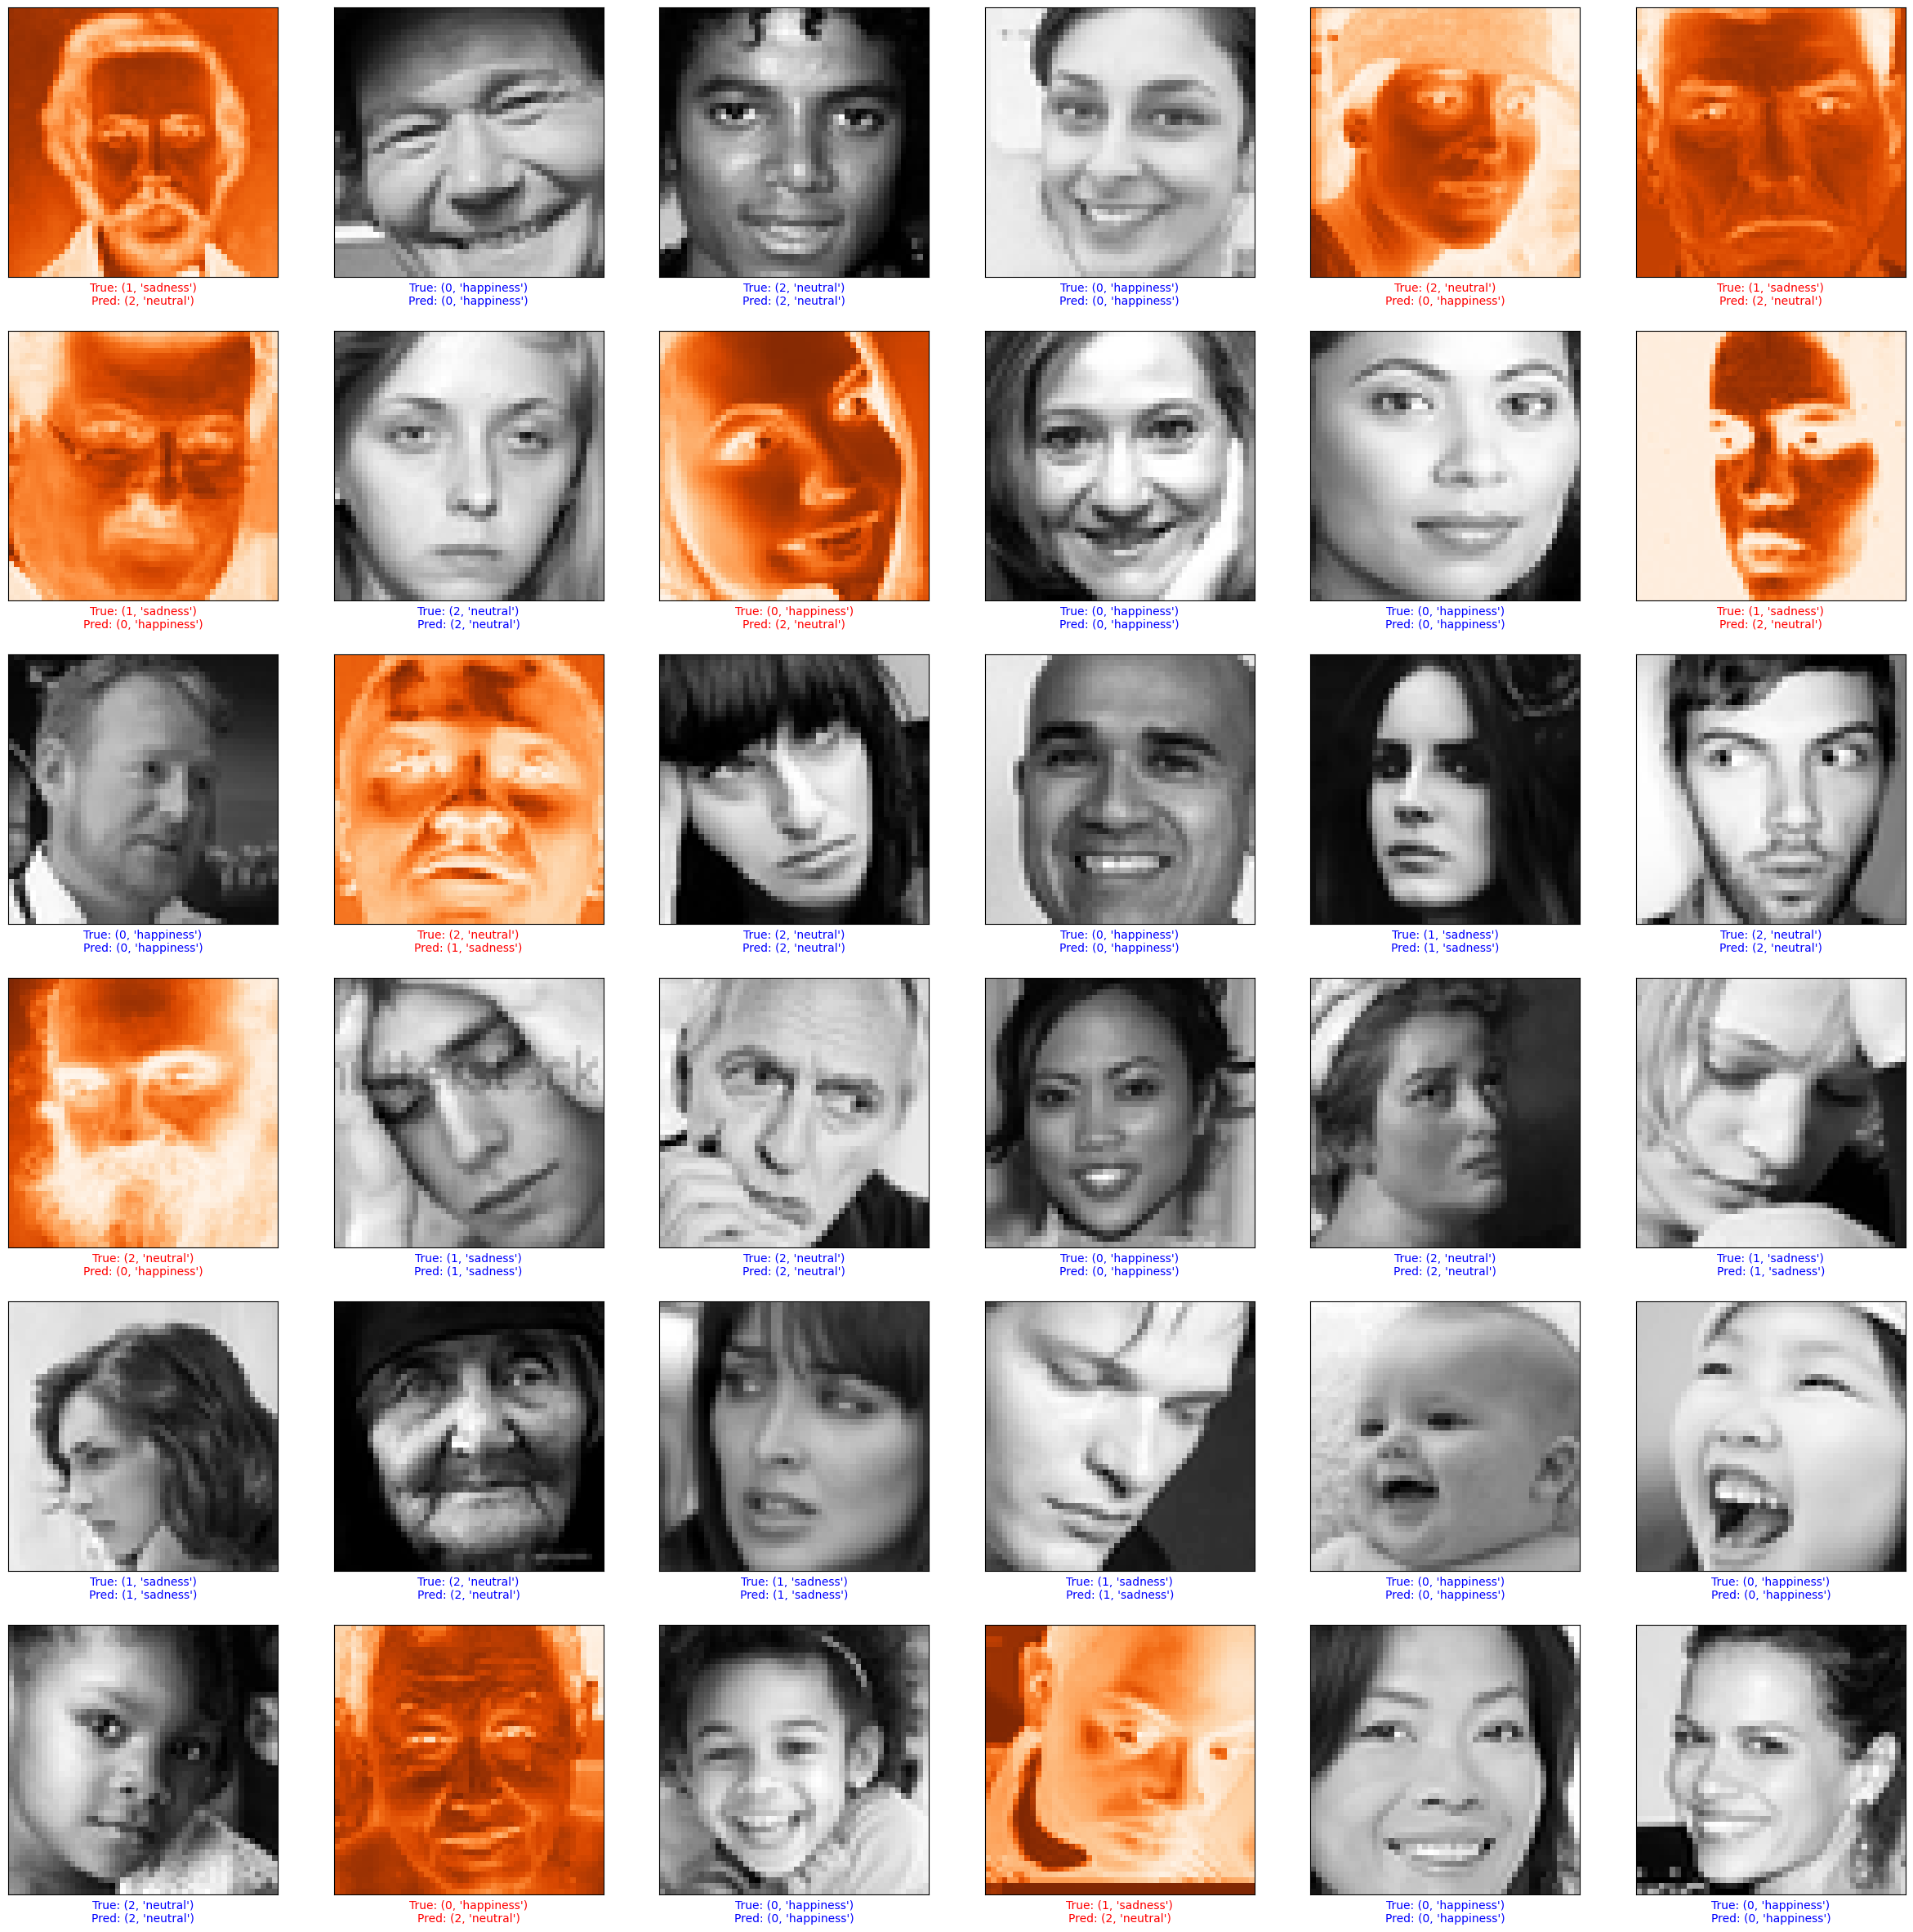

In [ ]:
plt.figure(figsize=(30, 30))
for i in range(36):
  plt.subplot(6, 6, i + 1)
  cmap_image = "gray" if y_true[i] == y_pred[i] else "Oranges"
  plt.imshow(x_test[i], cmap=cmap_image)
  plt.yticks([])
  plt.xticks([])
  c = "blue" if y_true[i] == y_pred[i] else "red"
  plt.xlabel(f"True: {y_true[i], emocion1(y_true[i])}\nPred: {y_pred[i], emocion1(y_pred[i])}", color=c)

plt.show()

Guardamos el modelo

In [ ]:
import joblib

In [ ]:
joblib.dump(model, "modelo_reconocimiento.pkl")

['modelo_reconocimiento.pkl']